# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Amazon Sale Report.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/unlock-profits-with-e-commerce-sales-data",
  file_path,
)

/tmp/ipython-input-1993507220.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'unlock-profits-with-e-commerce-sales-data' dataset.


/usr/local/lib/python3.12/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [6]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


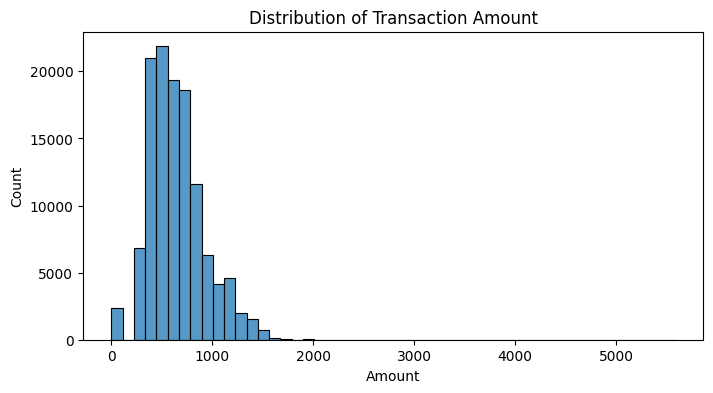

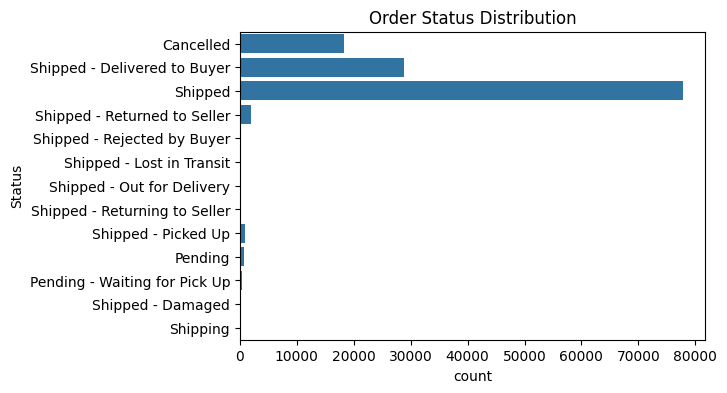

In [7]:
# distribution transaction
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'].dropna(), bins=50)
plt.title("Distribution of Transaction Amount")

# order status distribution
plt.figure(figsize=(6,4))
sns.countplot(y='Status', data=df)
plt.title("Order Status Distribution")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# drop kolom
df = df.drop(columns=[
    'index', 'Unnamed: 22',
    'Order ID', 'SKU', 'ASIN',
    'ship-city', 'promotion-ids',
    'fulfilled-by', 'ship-postal-code',
    'ship-country', 'Style'
])

df['label_profit'] = (
    (df['Amount'] > 0) &
    (df['Status'] != 'Cancelled')
).astype(int)

In [9]:
# feature engineering date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])

/tmp/ipython-input-4029850033.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
# handle missing value
df['Amount'] = df['Amount'].fillna(0)
df['Courier Status'] = df['Courier Status'].fillna('Unknown')

In [11]:
# encoding
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print("Final shape:", df_encoded.shape)
print(df_encoded['label_profit'].value_counts())
df_encoded.head()

Final shape: (128975, 110)
label_profit
1    108071
0     20904
Name: count, dtype: int64


,Qty,Amount,B2B,label_profit,month,year,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped,Status_Shipped - Damaged,...,ship-state_UTTAR PRADESH,ship-state_UTTARAKHAND,ship-state_WEST BENGAL,ship-state_bihar,ship-state_delhi,ship-state_goa,ship-state_orissa,ship-state_punjab,ship-state_rajasthan,ship-state_rajsthan
0,0,647.62,0,0,4,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,406.00,0,1,4,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,329.00,1,1,4,2022,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,753.33,0,0,4,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,574.00,0,1,4,2022,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
output_dir = "AmazonSaleReport_Preprocessing"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "amazon_sales_clean.csv")
df_encoded.to_csv(output_path, index=False)